In [1]:
import pandas as pd
from sklearn.datasets import make_classification
# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# Convert X and y into a DataFrame
# Create a DataFrame for the features
df_X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
# Create a DataFrame for the target
df_y = pd.DataFrame(y, columns=['Target'])
# Concatenate the feature and target DataFrames
df = pd.concat([df_X, df_y], axis=1)
# Display the first few rows of the DataFrame
print(df_X.head(), df_y.head())


   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   2.474755   0.401655   1.680818   2.889407   0.917045  -3.079506   
1   0.848025   2.818419  -2.760087  -3.315206   0.149164  -1.810581   
2  -1.900412  -0.569018  -1.762202  -0.583895   0.359125  -1.251286   
3  -1.012404  -1.482081  -0.968549   2.103057  -0.672274  -1.254941   
4  -0.189057  -3.512168   1.848276  -0.379249   0.359913  -2.542865   

   Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
0   4.399612   0.724643  -4.865636  -6.063381   -1.222099   -0.469962   
1   3.027528   0.111998  -0.728644  -9.393979   -2.374929    2.776886   
2  -0.856250   1.546021   4.521895  -0.037934    1.227937    1.208501   
3   1.951717  -1.463761  -0.489665   3.993727   -2.458270    0.843014   
4   2.840213  -2.299910   0.016949   1.894389    1.776891   -1.883850   

   Feature_12  Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  \
0    1.012227   -0.689936   -0.530006    6.869668   -3.27

## example of evaluating a bagging ensemble for classification

In [2]:
from numpy import mean
import pandas as pd
from numpy import std
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [3]:
# create the synthetic classification dataset
X, y = make_classification(random_state=1) 


In [4]:
# configure the ensemble model
model = BaggingClassifier(n_estimators=50)
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.950 (0.072)


## example of evaluating an AdaBoost ensemble for classification

In [5]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# create the synthetic classification dataset
X, y = make_classification(random_state=1)
# configure the ensemble model
model = AdaBoostClassifier(n_estimators=50)
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.947 (0.088)


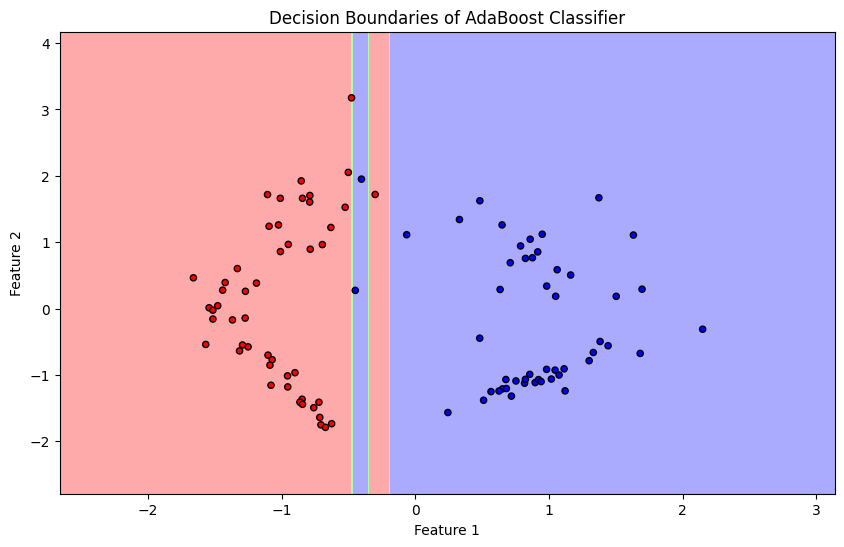

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')
# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Train the AdaBoost Classifier with Decision Trees as base estimators
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=1)
ada_classifier.fit(X, y)

# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict classifications for each point in the mesh grid
Z = ada_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundaries of AdaBoost Classifier")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## example of evaluating a gradient boosting ensemble for classification

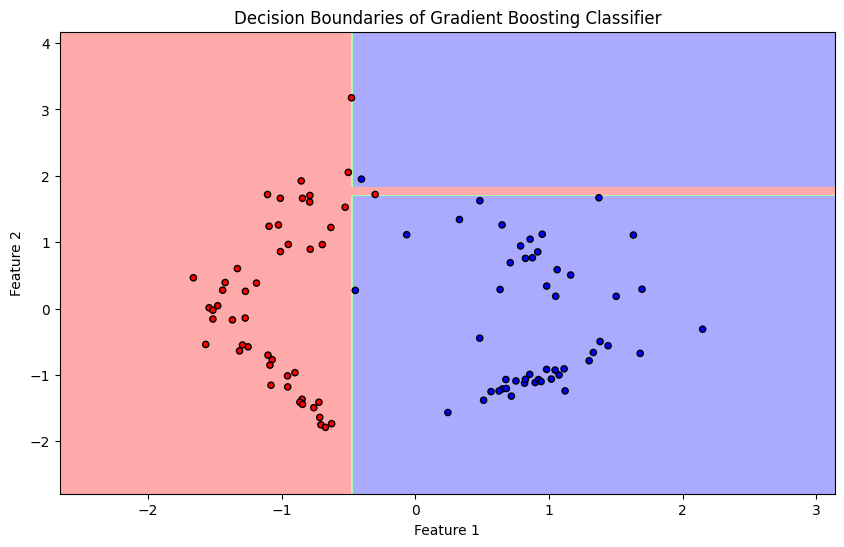

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=50, random_state=1)
gb_classifier.fit(X, y)

# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict classifications for each point in the mesh grid
Z = gb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundaries of Gradient Boosting Classifier")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# create the synthetic classification dataset
X, y = make_classification(random_state=1)
# configure the ensemble model
model = GradientBoostingClassifier(n_estimators=50)
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.930 (0.090)


## example of evaluating a voting ensemble for classification

In [9]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# create the synthetic classification dataset
X, y = make_classification(random_state=1)
# configure the models to use in the ensemble
models = [('lr', LogisticRegression()), ('nb', GaussianNB())]
# configure the ensemble model
model = VotingClassifier(models, voting='soft')
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.960 (0.061)


In [10]:
# example of evaluating a stacking ensemble for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# create the synthetic classification dataset
X, y = make_classification(random_state=1)
# configure the models to use in the ensemble
models = [('knn', KNeighborsClassifier()), ('tree', DecisionTreeClassifier())] 
# configure the ensemble model
model = StackingClassifier(models, final_estimator=LogisticRegression(), cv=3) 
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.940 (0.080)


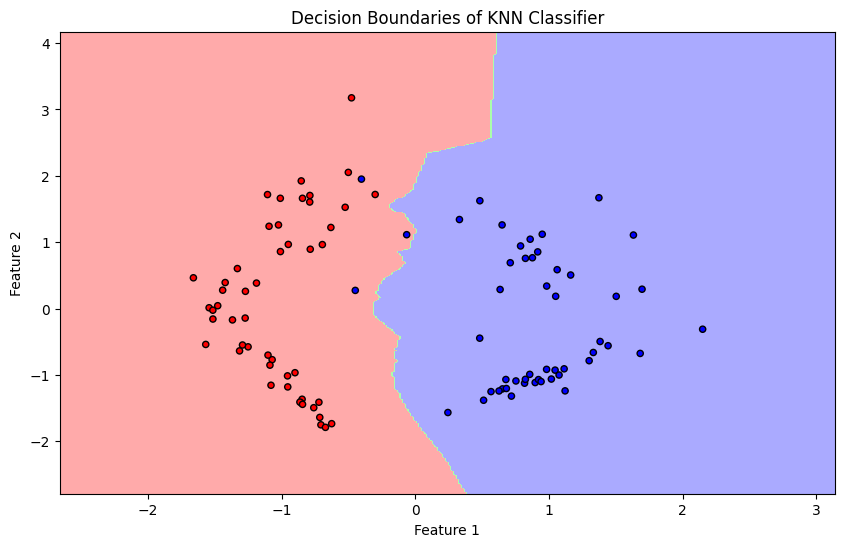

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X, y)

# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict classifications for each point in the mesh grid
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundaries of KNN Classifier")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


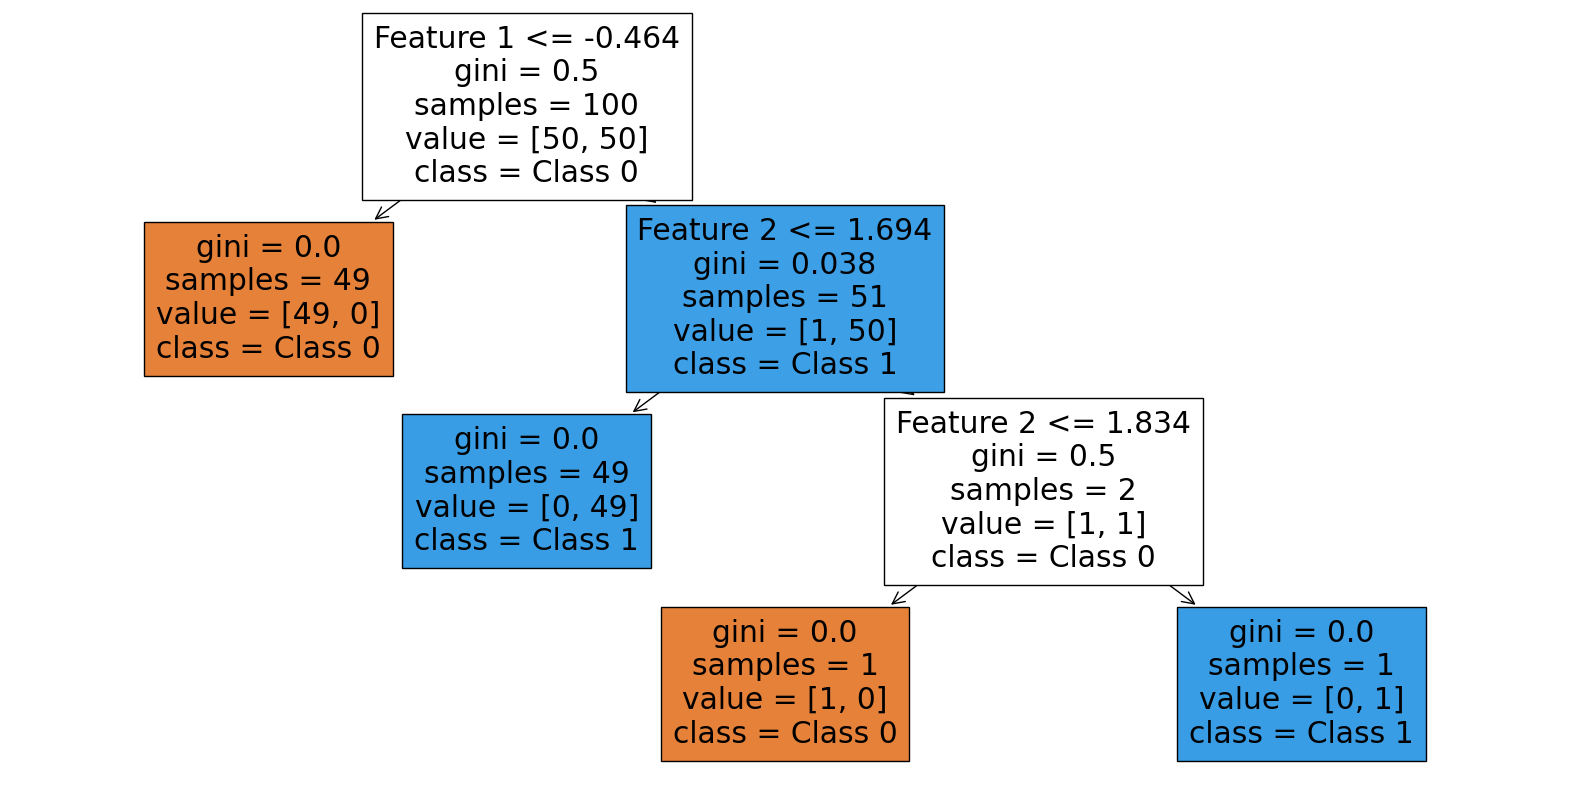

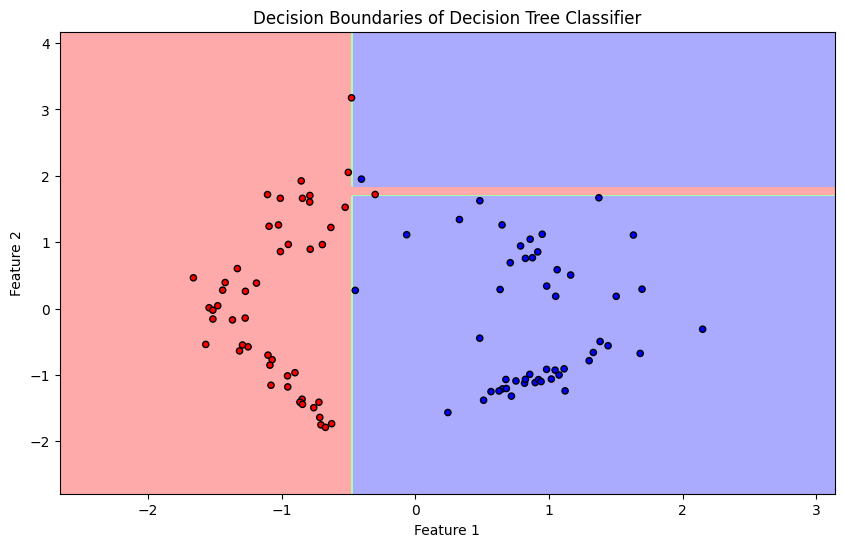

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.show()

# Plot decision boundaries
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundaries of Decision Tree Classifier")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Call the function to plot decision boundaries
plot_decision_boundaries(X, y, dt_classifier)


## The CNN Architecture and performance measures


In [16]:
!pip install pydot graphviz tensorflow 

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings 
#warnings.filterwarnings('ignore')

In [19]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to a range of 0 to 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to fit the model
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [20]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8998 - loss: 0.3344 - val_accuracy: 0.9848 - val_loss: 0.0464
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9849 - loss: 0.0480 - val_accuracy: 0.9899 - val_loss: 0.0332


In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Print a summary of the model
model.summary()

313/313 - 2s - 7ms/step - accuracy: 0.9899 - loss: 0.0332

Test accuracy: 0.9898999929428101


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [22]:
#!pip install --upgrade pydot graphviz

In [23]:
# Visualize the CNN architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

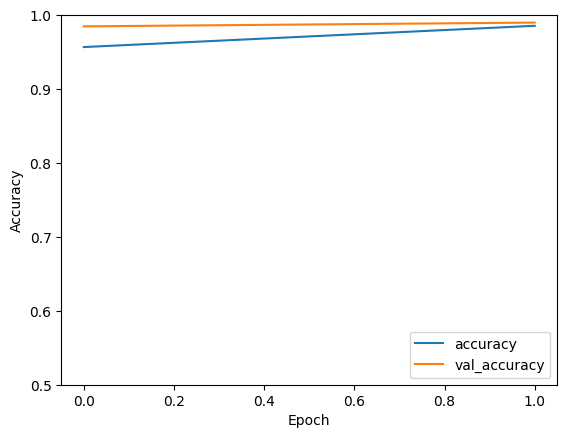

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [24]:
# Plot training history
import numpy as np
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

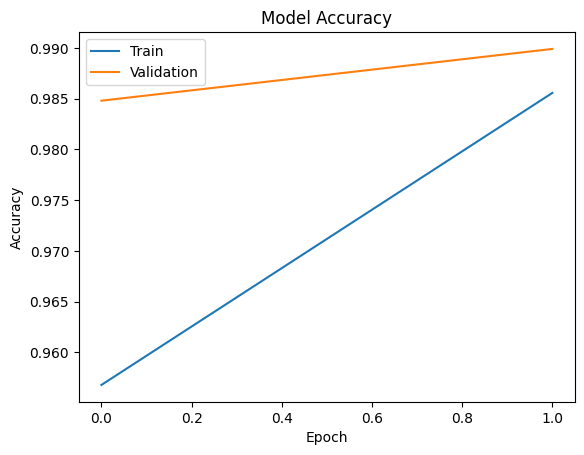

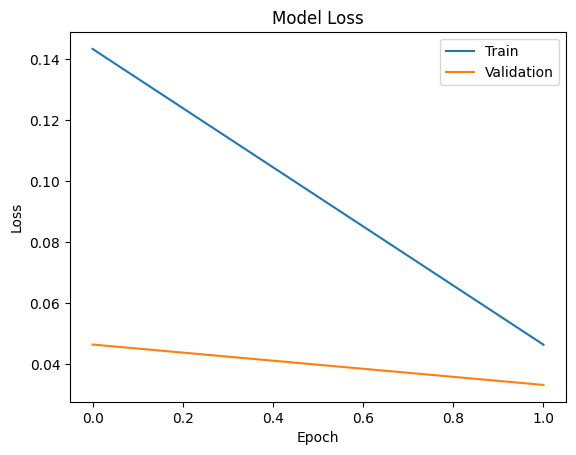

In [25]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
!pip uninstall pydot

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Plot the model architecture
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


AttributeError: module 'pydot' has no attribute 'InvocationException'